# Adult DP-SGD Parameter Scan Analysis
This notebook is used for analysing the results from the training script. The results are stored in a pandas dataframe with columns: epoch, noise_multiplier, clipping_norm, accuracy, val_accyracy, epsilon.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import feature_column
import tensorflow_datasets as tfds
import os
from os import path
import time
import datetime

## Analysis of results

In [3]:
df = pd.read_csv('results/dp_sgd_scan_results_all_results.csv')
#df_1 = pd.read_csv('results/dp_sgd_scan_results_1.csv')
#df_2 = pd.read_csv('results/dp_sgd_scan_results_2.csv')
#df_3 = pd.read_csv('results/dp_sgd_scan_results_3.csv')
#df_4 = pd.read_csv('results/dp_sgd_scan_results_4.csv')
#df = pd.concat([df_0, df_1, df_2, df_3, df_4])

In [4]:
# get best accuracy
noise_multiplier_list = [0.9, 1.0, 1.1, 1.15, 1.2, 1.25, 1.3, 1.4, 1.5, 
                         1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.15, 2.2, 2.25, 2.3, 2.4, 2.5]
df.sort_values(by=['val_acc'], ascending=False).head(10)

,epoch,noise_multiplier,clipping_norm,acc,val_acc,epsilon
1944,100,2.50,6.50,0.845809,0.850667,1.100322
1199,100,1.60,8.75,0.845809,0.850500,1.926084
1179,100,1.60,6.75,0.846515,0.850333,1.926084
2569,100,2.30,9.25,0.843485,0.850167,1.215356
1614,100,2.20,5.50,0.845643,0.850000,1.283409
1629,100,2.20,6.50,0.844315,0.850000,1.283409
1634,100,2.20,6.75,0.847261,0.849833,1.283409
2049,100,2.15,6.50,0.843651,0.849833,1.319231
794,100,1.70,6.00,0.846681,0.849833,1.776906
1544,100,2.10,7.50,0.846100,0.849833,1.358092


### Plot results for single epoch

In [5]:
def plot_scatter_single_epoch(epoch, noise_multiplier_list, marker):
    f, ax = plt.subplots(figsize=(6*3, 6), tight_layout=True, ncols=3, sharey=True)
    
    for i, noise in enumerate(noise_multiplier_list):
        
        df_selected = df.loc[(df['epoch'] == epoch) & (df['noise_multiplier'] == noise)]
        
        x = df_selected['epsilon']
        y = df_selected['acc']
        ax[0].scatter(x, y, marker=marker, label='noise-x: {}'.format(noise),
                   alpha=0.8)
        
        x1 = df_selected['clipping_norm']
        y1 = df_selected['acc']
        ax[1].scatter(x1, y1, marker=marker, label='noise-x: {}'.format(noise),
                   alpha=0.8)

        x2 = df_selected['noise_multiplier']
        y2 = df_selected['acc']
        ax[2].scatter(x2, y2, marker=marker, label='noise-x: {}'.format(noise),
                   alpha=0.8)

    ax[0].set_xlabel("Epsilon", fontsize=12)
    ax[0].set_ylabel("Accuracy", fontsize=12)
    ax[0].grid(True)
    
    ax[1].set_xlabel("Clipping Norm", fontsize=12)
    ax[1].grid(True)
    
    ax[2].set_xlabel("Noise Multpilier", fontsize=12)
    ax[2].legend(fontsize=10, bbox_to_anchor=(1.3, 1), loc='upper right')
    ax[2].grid(True)

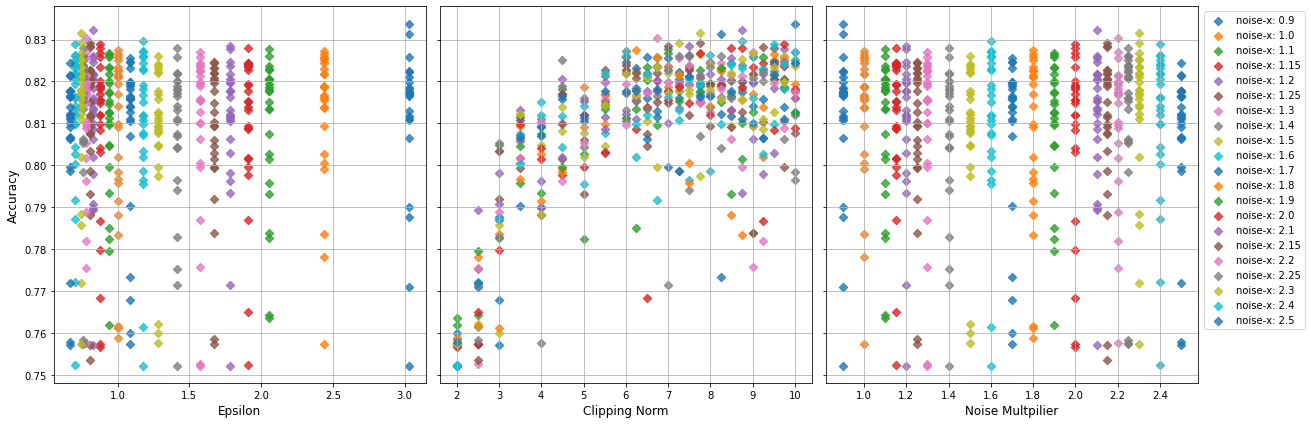

In [6]:
color = ['#C0392B', '#9B59B6', '#F1C40F', '#1ABC9C', '#34495E', '#2980B9', '#BDC3C7', '#D35400', '#7F8C8D']
plot_scatter_single_epoch(40, noise_multiplier_list, 'D')

### Plot all epoch results

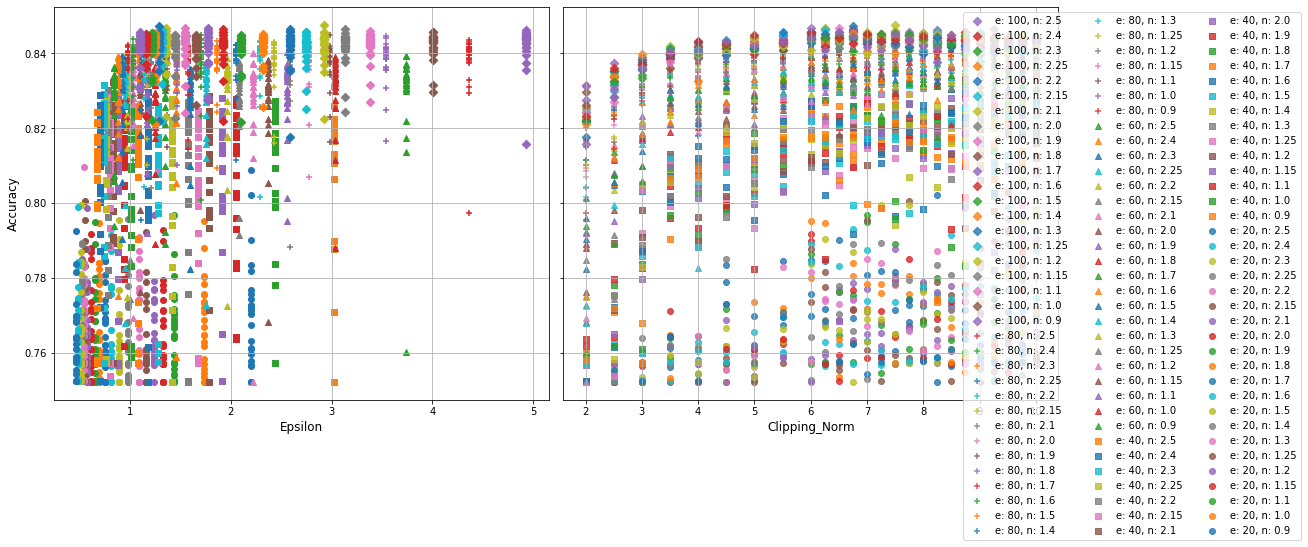

In [7]:
f, ax = plt.subplots(figsize=(18, 7.5), tight_layout=True, ncols=2, sharey=True)

color = ['#C0392B', '#9B59B6', '#F1C40F', '#1ABC9C', '#34495E', '#2980B9', '#BDC3C7', '#D35400', '#7F8C8D']
marker = ['o', 's', '^', '+', 'D']

for j, epoch in enumerate([20, 40, 60, 80, 100]):
    for i, noise in enumerate(noise_multiplier_list):
        df_selected = df.loc[(df['epoch'] == epoch) &  (df['noise_multiplier'] == noise)]

        x = df_selected['epsilon']
        y = df_selected['acc']
        ax[0].scatter(x, y, marker=marker[j], label='e: {}, n: {}'.format(epoch, noise), alpha=1)
        
        x1 = df_selected['clipping_norm']
        y1 = df_selected['acc']
        ax[1].scatter(x1, y1, marker=marker[j], label='e: {}, n: {}'.format(epoch, noise), alpha=0.8)

ax[0].set_xlabel("Epsilon", fontsize=12)
ax[0].set_ylabel("Accuracy", fontsize=12)
ax[0].grid(True)

handles, labels = ax[1].get_legend_handles_labels()
labels, handles = labels[::-1], handles[::-1]

ax[1].set_xlabel("Clipping_Norm", fontsize=12)
ax[1].legend(handles, labels, fontsize=10, bbox_to_anchor=(1.5, 1), loc='upper right', ncol=3)
ax[1].grid(True)


plt.show()

### Scatter heatmap of experiments

In [15]:
# plot options
ACCURACY_CUT = 0.7
EPSILON_CUT = 5

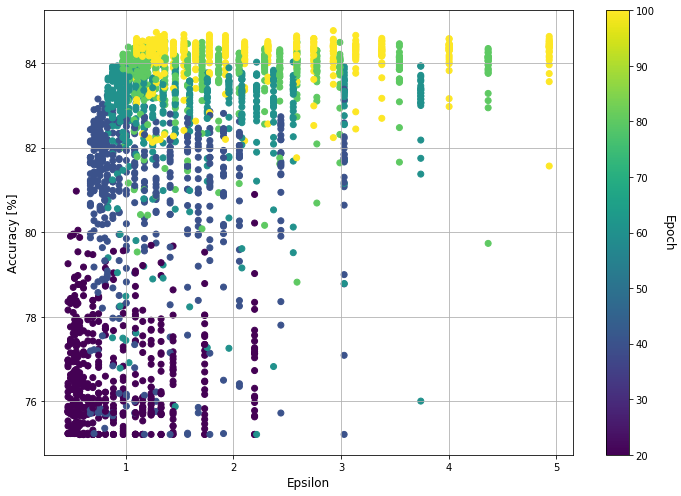

In [19]:
f, ax = plt.subplots(figsize=(10, 7), tight_layout=True)
cm = plt.cm.get_cmap('viridis')


color = ['#C0392B', '#9B59B6', '#F1C40F', '#1ABC9C', '#34495E', '#2980B9', '#BDC3C7', '#D35400', '#7F8C8D']
marker = ['o', 's', '^', '+', 'D']

df_plot = df.loc[(df['acc'] >= ACCURACY_CUT) & (df['epsilon'] <= EPSILON_CUT)]

x = df_plot['epsilon']
y = df_plot['acc']*100
z = df_plot['epoch']
sc = ax.scatter(x, y, c=z, cmap=cm, alpha=1)


ax.set_xlabel("Epsilon", fontsize=12)
ax.set_ylabel("Accuracy [%]", fontsize=12)
ax.grid(True)


f.colorbar(sc).set_label('Epoch', rotation=270, fontsize=12, labelpad=20)
plt.savefig("plots/parameter_scan_results.pdf")

### Hyperparameter selection

In [15]:
new_df = df.loc[(df['epsilon'] < 1) & (df['acc'] > 0.8)]

In [16]:
new_df.sort_values(by=['epsilon']).head(20)

,epoch,noise_multiplier,clipping_norm,acc,val_acc,epsilon
1630,20,2.20,6.75,0.809710,0.811000,0.539907
2070,20,2.15,7.75,0.800456,0.802500,0.555264
2621,40,2.50,10.00,0.824274,0.830333,0.671176
1906,40,2.50,3.50,0.806805,0.809833,0.671176
1911,40,2.50,4.00,0.809087,0.808167,0.671176
2616,40,2.50,9.75,0.813817,0.819833,0.671176
1921,40,2.50,5.00,0.811992,0.816000,0.671176
1926,40,2.50,5.50,0.817676,0.821167,0.671176
2611,40,2.50,9.50,0.821577,0.822833,0.671176
1931,40,2.50,6.00,0.817635,0.821333,0.671176


In [11]:
NOISE_MULTIPLIER = 2.5
CLIPPING_NORM = 10